In [20]:
import qkit
qkit.cfg['load_visa'] = True
qkit.cfg['datafolder_structure'] = 2
# New Qkit does not create folder. Must be done before run! (think a txt doc is created which causes this)
qkit.cfg['datadir'] = r'd:\notebooks\Adam_FMR'
qkit.cfg['run_id'] = 'Test_Rair_Py_21_07_22'
qkit.cfg['user'] = 'Rair'
qkit.start()

from qkit.measure.spectroscopy import spectroscopy
from qkit.storage.store import Data
import qkit.measure.samples_class as sc
import matplotlib.pyplot as plt
from qkit.analysis.circle_fit.circle_fit_2019 import circuit
from scipy import signal as sg
import qkit.analysis.qfit as qfit
from importlib import reload
import qkit.gui.notebook.Progress_Bar as Pb
import qkit.measure.spectroscopy.spectroscopy as spectroscopy
from importlib import reload
import numpy as np
import time

Starting QKIT framework ... -> qkit.core.startup
Loading module ... S10_logging.py
Loading module ... S14_setup_directories.py
Loading module ... S16_available_modules.py
Loading module ... S20_check_for_updates.py
Loading module ... S25_info_service.py
Loading module ... S30_qkit_start.py
Loading module ... S65_load_RI_service.py
Loading module ... S70_load_visa.py
Loading module ... S80_load_file_service.py
Loading module ... S85_init_measurement.py
Loading module ... S98_started.py
Loading module ... S99_init_user.py


In [21]:
caen = qkit.instruments.create('caen', 'Caen_FAST_PS', address='10.22.197.101')
vna = qkit.instruments.create('vna', 'ZVA_40_VNA', address='GPIB0::20::INSTR')
#hall_probe = qkit.instruments.create('hall_probe', 'Magnet_Physik_FH_54', address='ASRL3::INSTR')


2022-07-26 11:45:26 [WARNING ]: Instrument "caen" already exists, removing (instrument_tools.py:222)
2022-07-26 11:45:26 [WARNING ]: Instrument "vna" already exists, removing (instrument_tools.py:222)


In [22]:
smpl = sc.Sample()
s = spectroscopy.spectrum(vna = vna, exp_name = '', sample = smpl)

comment = """
    test to see VNA second PCB
    """
s.comment = comment
s.measure_1D()

HTML(value="<table style='width:100%'><tr><td> (0/1) </td><td>&#9992; 2022-07-26 (Tue) 11:45:32    </td><td>&#…

IntProgress(value=0, description='VNA_tracedata', layout=Layout(width='95%'), max=1)

d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFMJ7U_VNA_tracedata\RFMJ7U_VNA_tracedata.h5


C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:677: FutureWarning: ask_values is deprecated and will be removed in 1.10, use query_ascii_values or quey_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:518: FutureWarning: read_values is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\util.py:266: FutureWarning: parse_binary is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)


In [23]:
caen.on()
caen.get_current()

-0.000474917032989

Plots saved in d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFMJ7U_VNA_tracedata\images


In [24]:
vna.set_ifbandwidth(3e3)
vna.set_power(-5)
vna.set_startfreq(3.00e9) # use the correct values should be somewhere between 4 and 6 GHz
vna.set_stopfreq(15.00e9)
vna.set_nop(5001)

True

In [25]:
start_current = -4.1
stop_current = 4.1
currents = np.arange(start_current, stop_current, 0.1)

In [26]:
# change the current function accordingly
s.set_x_parameters(currents, 'current', caen.ramp_current, 'A' )


In [32]:
comment = """
    Run test. CoRu PLATE, second PCB board with fibre glass support. 
    Ramping tranmsission line on CAENel from 0.5 to 2.5 A
    """
s.comment = comment
s.set_resonator_fit(fit_resonator=False)

# x_func gets called for every value of i. Here it would be not necessary to define a function for only the ramp fct,
# it will be useful in the next example.
def x_func(i):
    return caen.ramp_current(i, 1e-1)

#s.set_log_function(func=[hall_probe.get_field], name=['Field'], unit=['mT'])

s.set_x_parameters(x_vec = np.arange(0.1, 4.0, 0.1),
                  x_coordname = 'current',
                  x_set_obj = x_func,
                  x_unit = 'A')


s.measure_2D()
caen.ramp_current(0, 3)

HTML(value="<table style='width:100%'><tr><td> (0/39) </td><td>&#9992; 2022-07-26 (Tue) 13:54:51    </td><td>&…

IntProgress(value=0, description='2D VNA sweep current', layout=Layout(width='95%'), max=39)

C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:677: FutureWarning: ask_values is deprecated and will be removed in 1.10, use query_ascii_values or quey_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\resources\messagebased.py:518: FutureWarning: read_values is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)
C:\anaconda3\lib\site-packages\pyvisa\util.py:266: FutureWarning: parse_binary is deprecated and will be removed in 1.10, use read_ascii_values or read_binary_values instead.
  'instead.', FutureWarning)


d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFMP68_2D_current\RFMP68_2D_current.h5
Plots saved in d:\notebooks\Adam_FMR\Test_Rair_Py_21_07_22\Rair\RFMP68_2D_current\images


True

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.


Text(0, 0.5, 'Frequency [GHz]')

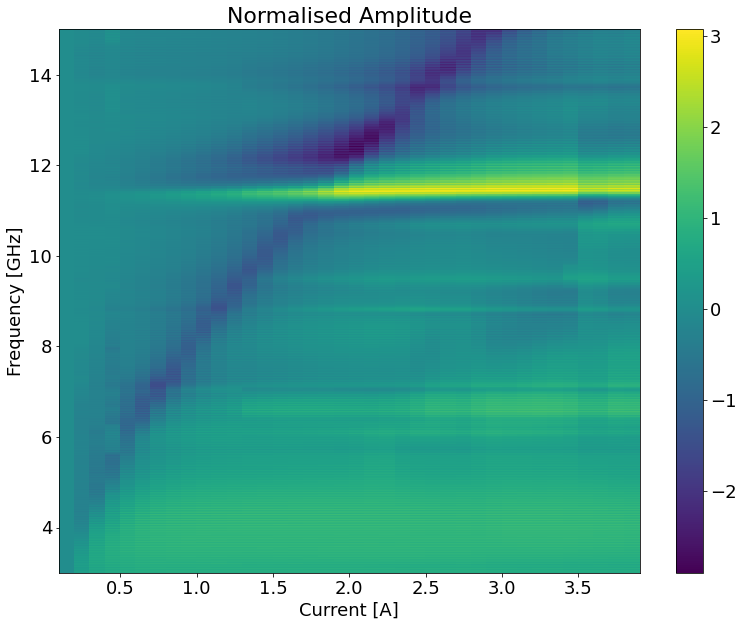

In [37]:
hdf1 = Data(r"d:\notebooks\Adam_FMR/Test_Rair_Py_21_07_22/Rair/RFMP68_2D_current/RFMP68_2D_current.h5")
#hdf1 = Data(r"d:\notebooks\Luke_LiFe_Tests/Test_Rair_FMR_CoRu_02_11_21/Luke/R1Y5D8_2D_current/R1Y5D8_2D_current.h5")
amp1 = np.transpose(hdf1.data.amplitude[:])
amp1dB = 20*np.log10(amp1)
freq1 = hdf1.data.frequency[:]/1e9
current1 = hdf1.data.current[:]
phase1 = np.transpose(np.unwrap(hdf1.data.phase))

hdf2 = Data(r"d:\notebooks\Adam_FMR/Test_Rair_Py_21_07_22/Rair/RFMP68_2D_current/RFMP68_2D_current.h5")
amp2 = np.transpose(hdf2.data.amplitude[:])
amp2dB = 20*np.log10(amp2)
freq2 = hdf2.data.frequency[:]/1e9

current2 = hdf2.data.current[:]
phase2 = np.transpose(np.unwrap(hdf2.data.phase))

rows1=amp1.shape[0]
cols1=amp1.shape[1]

namp1=np.zeros((rows1,cols1))
namp1dB=np.zeros((rows1,cols1))
nphase1=np.zeros((rows1,cols1))
for x in range(0, cols1 - 1):
    for y in range(0, rows1 -1):
        namp1[y,x]=(amp1[y,x]/amp1[y,0])
        namp1dB[y,x]=20*np.log10(amp1[y,x])-20*np.log10(amp1[y,0])
        nphase1[y,x] = phase1[y,x] - phase1[y,0]
        
#rows2=amp2.shape[0]
#cols2=amp2.shape[1]

#namp2=np.zeros((rows2,cols2))
#namp2dB=np.zeros((rows2,cols2))
#nphase2=np.zeros((rows2,cols2))
#for x in range(0, cols2 - 1):
#    for y in range(0, rows2 -1):
#        namp2[y,x]=(amp2[y,x]/amp2[y,0])
#        namp2dB[y,x]=20*np.log10(amp2[y,x])-20*np.log10(amp2[y,0])
#        nphase2[y,x] = phase2[y,x] - phase2[y,0]

plt.figure(figsize=(13,10))
plt.pcolormesh(current1[:],freq1[:],namp1dB[:])
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.tick_params(labelsize=18)
#plt.xticks(size = 18)
#plt.yticks(size = 18)
plt.title('Normalised Amplitude', fontsize=22)
plt.xlabel('Current [A]', fontsize=18)
plt.ylabel('Frequency [GHz]', fontsize=18)

#need